# Simple Maths Equations

As well as rendering simple text based markdown scripts as richer HTML, Jupyter notebook markdown cells can also include `TeX`/`LateX` script using *Mathjax*.

Mathematical expressions can also be defined, rendered and evaluated, using the `sympy` symbolic maths package, an approach that can be used to limit the potential for introducing errors when equations are calculated or solved.

Note that `sympy` code can be embedded - and rendered - within notebook markdown cells. However, this requires:

- the `Python markdown` extension to be enabled (and the notebook reloaded?)
- the notebook to be trusted
- the markdown cell to be run in the correct order (with any code cells it is dependent on being run first).

Whilst authoring maths texts directly using *LaTeX* provides a significant degree of control over the typographical properties, it is often at the risk that logical or numerical errors can enter the text if it spans several related mathematical expressions. The ability to generate at least "first draft" *LaTeX* expressions directly from expressions derived from symbolic maths manipulations may help reduce mathematical errors or inconsistencies within a text that is heavy in mathematical derivations.

## `Mathjax`

For example, including the following as "raw" text in a markdown cell:

```
\begin{align}
\dot{x} & = \sigma(y-x) \\
\dot{y} & = \rho x - y - xz \\
\dot{z} & = -\beta z + xy
\end{align}
```

renders as:

\begin{align}
\dot{x} & = \sigma(y-x) \\
\dot{y} & = \rho x - y - xz \\
\dot{z} & = -\beta z + xy
\end{align}

*Double click on this cell in a running notebook environment to enter cell edit mode to see the raw markdown / LaTex.*

More complex expressions / equations are, of course, possible:

\begin{equation*}
\left( \sum_{k=1}^n a_k b_k \right)^2 \leq \left( \sum_{k=1}^n a_k^2 \right) \left( \sum_{k=1}^n b_k^2 \right)
\end{equation*}

We can also include inline `TeX` expressions, such as $\sqrt{3x-1}+(1+x)^2$, which means we don't need to break onto a new line if we don't want to.

This is achieved by enclosing the expression within start and end `$` characters.

For example, the above inline expression is written inline as `$\sqrt{3x-1}+(1+x)^2$`.

A full range of multiline and matrix notations are available too:

\begin{cases} 3x + 5y + z = 0 \\ 7x – 2y + 4z = 4 \\ -6x + 3y + 2z  = -2\end{cases}

\begin{equation*}\left| \begin{array}{cc} x_{11} & x_{12} \\ x_{21} & x_{22} \end{array} \right|\end{equation*}

\begin{bmatrix} 0 & \cdots & 0 \\ \vdots & \ddots & \vdots \\ 0 & \cdots & 0 \end{bmatrix}



*Some [more examples](https://kogler.wordpress.com/2008/03/21/latex-multiline-equations-systems-and-matrices/) to draw on...*

## Equation Numbering

A notebook extension adds in the ability to automatically number equations within a notebook.

The extension can be enabled from the extension configurator: [equation numbering](../nbextensions/?nbextension=equation-numbering/main).

Numbered equations are identified by specifying them within `{equation}` tags:

```
\begin{equation}
E = F \cdot s 
\end{equation}
```

Enable the extension and then refresh this notebook page.

Select and run the following notebook cell to re-render it:

\begin{equation}
E = F \cdot s 
\end{equation}

\begin{equation*}
E = F \cdot s 
\end{equation*}

\begin{equation}
E = F \cdot s 
\end{equation}

## `sympy`

`sympy` is a symbolic maths package that allows equatrions to be rendered - and calculated - in a similar way to the way mathematical expressions can be handled in a package such as Mathematica. (Note that [programming language kernels](https://github.com/jupyter/jupyter/wiki/Jupyter-kernels) other than Python can be used by Jupyter notebook code cells, including *SageMath*, *Matlab*, *Scilab* and *Octave*.)

Part of the advantage of using a symbolic maths engine to support the production of educational materials is that we can minimise the chances of introducing errors in some expressions by allowing a machine to calculate them, albeit subject to the logical ordering or layout constraints imposed by the symobolic maths engine.

Using `sympy` on a Jupyter python kernel is not necessarily the best way of writing maths based materials, but it's free and available directly on Azure Notebooks without the need to install any other kernels.

In [1]:
%%capture
try:
    import sympy
except:
    !pip install sympy

In [2]:
#Enable pretty printing in the notebooks
from sympy import init_printing
init_printing() 

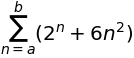

In [3]:
from sympy import symbols, Sum

a, b, n = symbols('a b n')
s= Sum(6*n**2 + 2**n, (n, a, b))
s

In [4]:
#Calculate the summation
s.doit()

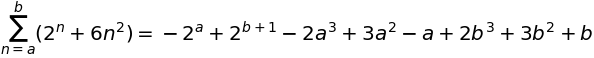

In [5]:
#We can present this as an equality
from sympy import Eq
Eq(s, s.doit())

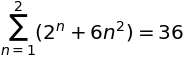

In [6]:
#We can substitute in values and perform the calculation
s2=s.subs(a, 1).subs(b, 2)
Eq(s2, s2.doit())

`sympy` can also simplify expressions. For example:

In [7]:
from sympy import simplify

from sympy import sin, cos

x = symbols('x')
expr = sin(x) * cos(x)

Eq(expr,simplify(expr))

Letting the machine calculate the simplified expression directly from the original expression removes the chances of error that occur when manually authoring such statements. For example, we can embed the above expression in a markdown cell as follows:

{{Eq(expr,simplify(expr))}}


### Solve a simple equation

We can make use of values defined in code cells within markdown cells. For example:

In [8]:
from sympy import factor

eqn = Eq(x**3 + 2*x**2 + 4*x + 8, 0)
feqn = factor(eqn)

We can define an equation:

{{eqn}}

and then factorise it:


{{feqn}}

 
(To render this cell correctly requires the *Python markdown* extension to be enabled,  the notebook trusted and the cell to be run.)

We can also go round the other way:

In [9]:
from sympy import expand

expand(factor(eqn))

Unfortunately, I don't think there's a way of seeing what steps are taking when factorising the original function, which makes is slightly less useful for teaching purposes. However, we can still use `sympy` to check that our factorised or expanded solution is correct.

We can also solve the equation to find the numerical roots of it:

In [10]:
from sympy import solve

# We can solve the equation automatically:
roots=solve(eqn)
print('There are {} roots to this equation:'.format(len(roots)))
display(roots)

There are 3 roots to this equation:


We can embed the `sympy` expressions in a markdown cell if we enable the `Python Markdown` notebook extension and check that the notebook is trusted.

For example, the solution of:

{{eqn}}

has {{str(len(roots))}} roots, specifically:

{{solve(eqn, x)}}

### Calculus

We can use `sympy` to help us write differential equations as well as differentiating and integrating expressions and solving differential and integral equations.

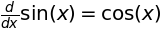

In [11]:
from sympy import Derivative
expr = sin(x)
Eq(Derivative(expr, x), Derivative(expr, x).doit())

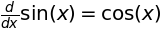

In [12]:
#We can also call the diff function to differentiate an expression explicitly
from sympy import diff
Eq(Derivative(expr, x), diff(expr, x))

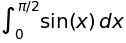

In [14]:
from sympy import Integral
#We can add limits to integrals
from sympy import pi
Integral(sin(x), (x, 0, pi/2))

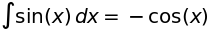

In [15]:
#And calculate integrals either directly from an Integral using .doit(), or via integrate()
from sympy import integrate, Integral
Eq(Integral(expr, x), integrate(expr, x))

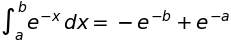

In [17]:
from sympy import exp
#We can solve integrals symbolically, although we can't see the working...
expr=Integral(exp(-x), (x, a, b))
Eq(expr,expr.doit())

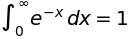

In [18]:
#And we can also calculate integrals when limits are provided
from sympy import oo, exp
expr=Integral(exp(-x), (x, 0, oo))
Eq(expr,expr.doit())

### Matrices

We have ready access to matrix representations within `sympy`.

In [19]:
from sympy import Matrix, Symbol

y = Symbol('y')
#Define the matrix as a list of row lists
#The matrix element values may be symbols
A = Matrix([[1,x], [y,1]])
A

⎡1  x⎤
⎢    ⎥
⎣y  1⎦

In [20]:
#Find the transpose
A.T

⎡1  y⎤
⎢    ⎥
⎣x  1⎦

In [21]:
#symbols can be instantiated with particular values...
A.subs(y,5)

⎡1  x⎤
⎢    ⎥
⎣5  1⎦

In [22]:
#We can also do sums on matrices
A2=A**2
Eq(A2,A2.subs(x,3))

⎡x⋅y + 1    2⋅x  ⎤   ⎡3⋅y + 1     6   ⎤
⎢                ⎥ = ⎢                ⎥
⎣  2⋅y    x⋅y + 1⎦   ⎣  2⋅y    3⋅y + 1⎦

In [23]:
A * A.T

⎡ 2            ⎤
⎢x  + 1  x + y ⎥
⎢              ⎥
⎢         2    ⎥
⎣x + y   y  + 1⎦

### Simultaneous Linear Equations

??https://stackoverflow.com/a/31547816/454773

In [24]:
equations = [
    Eq( 2*x + 1*y ,  10 ),
    Eq( 1*x - 2*y ,  11 )
]
equations

I'm not sure if there's a `sympy` way of doing this, but we can construct a hacky route to churning a list of equations into something a little more nicely formatted:

In [27]:
from sympy import latex
eqs='\\begin{cases}'+' \\\ '.join([latex(e) for e in equations])+'\\end{cases}'
Latex(eqs)

NameError: name 'Latex' is not defined

In [ ]:
solve(equations)

In [ ]:
#Alternatively (solutions are in order provided)
linsolve(equations, (x, y))

In [ ]:
#If we assume expressions are set to equal 0:
linsolve([2*x + y - 10, x-2*y - 11 ], (x, y))

In [ ]:
from sympy import linsolve

#Augmented matrix; the final column shows what each row equation equals
#The presentation is not ideal from a teaching sense
#Ideally we would annotation the matrix, eg with a bar to separate off the solution?
M = Matrix(([2, 1, 10], [1, -2, 11]))
M

Even if we don't get the form of *LaTeX* we want for a particular expression, we might be able to get a first draft of it from a `sympy` representation:

In [ ]:
latex(M)

In [ ]:
#We can solve the augmented matrix representation sttraghtforwardly
linsolve(M, (x, y))

In [ ]:
#This is perhaps slightly clearer in how we define things from the matrix, 
#  at least, if you know how to read indices!
#We have system of the form A*x = b
system = A, b = M[:, :-1], M[:, -1]

linsolve(system, x, y)

## `mhchem` Chemical Equations


See the `3.1.1 Chemical Equations.ipynb` notebook for examples of how to enable and use the `mhchem` *MathJax* extension for writing simple chemical equations.